In [17]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Drops specific values in a dataframe
# if flag = 1, drops values less than 'val'
# if flag = 0, drops values greater than 'val'
def drop_values(dataframe, column, val, flag):
    if flag:
        return dataframe.drop(dataframe[column < val].index)
    else:
        return dataframe.drop(dataframe[column > val].index)
    
# Normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
    
# MAKE THE CLUSTER DATAFRAME
dataframe = pd.read_pickle('pkl_datasets/CLUSTER_DATASET_1h.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,1.490,3.941,5.639,40.473,15.705,11.404,4.303,12.375,27.602
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,1.910,5.132,6.875,40.592,19.672,15.035,4.628,12.848,26.503
2020-05-06 18:00:00,18.713167,20.979889,1.914444,2.970556,3.246667,53.447722,1.424056,98.456389,1.422115,99124.504444,2.493,7.458,9.555,39.162,21.342,16.181,5.170,12.150,27.662
2020-05-06 19:00:00,15.544500,24.716389,2.207222,3.381667,3.666111,53.151778,1.423809,91.426611,1.422016,99156.430556,1.458,10.777,12.126,35.057,16.456,11.442,5.010,11.400,28.912
2020-05-06 20:00:00,14.085389,23.612889,1.320000,1.861111,1.991111,49.789500,1.423761,74.300333,1.422064,99214.601111,0.397,3.695,4.078,38.341,13.062,9.670,3.400,10.556,26.898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-11 08:00:00,22.536722,47.906389,0.006667,0.012778,0.035556,33.327778,1.424768,113.768333,1.422166,98993.835000,1.155,2.578,3.717,12.515,9.557,8.350,1.206,17.117,60.513
2020-06-11 09:00:00,27.375333,36.148278,0.310000,0.345556,0.371111,41.197000,1.425056,80.151056,1.422676,99148.971667,1.176,2.672,3.848,21.919,9.565,8.244,1.322,18.267,50.782
2020-06-11 10:00:00,29.620167,32.527056,0.034444,0.055000,0.083889,52.062222,1.425067,83.708444,1.422796,99232.233333,1.290,2.521,3.767,22.186,8.287,6.954,1.334,19.047,50.624


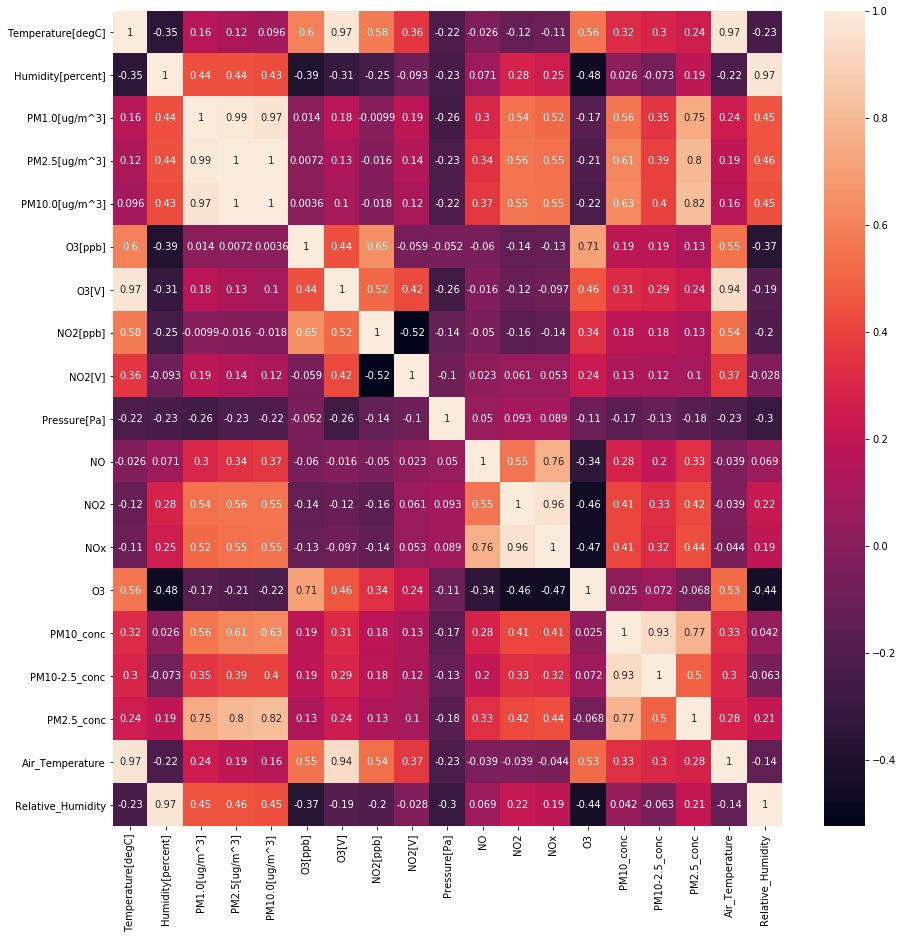

In [3]:
corrMatrix = dataframe.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

0.945070107247789

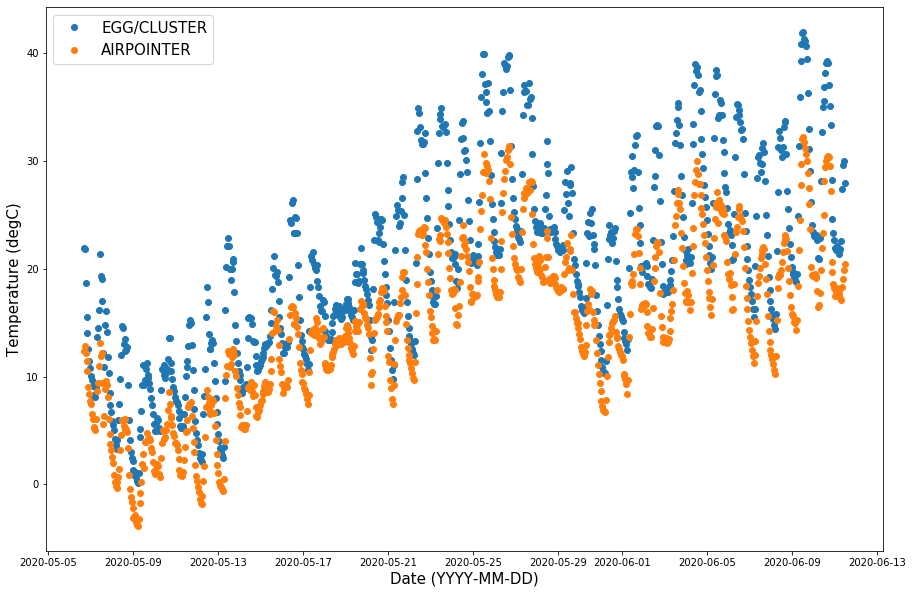

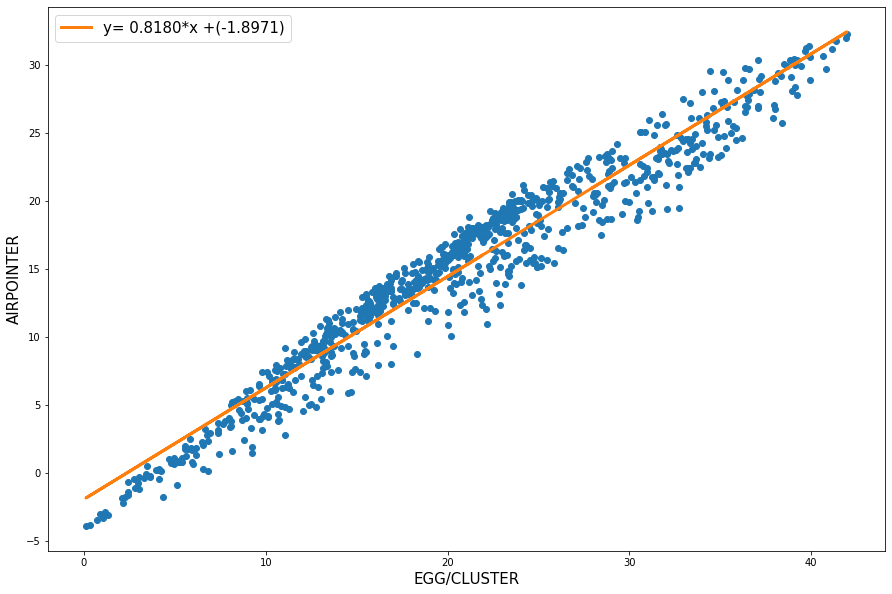

In [4]:
# ----------------------------- TEMPERATURE FROM CLUSTER vs. AIR_TEMPERATURE FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Temperature[degC]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['Air_Temperature'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Temperature (degC)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['Temperature[degC]'].to_numpy()
# Airpointer
yValues = dataframe['Air_Temperature'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.9481468446209877

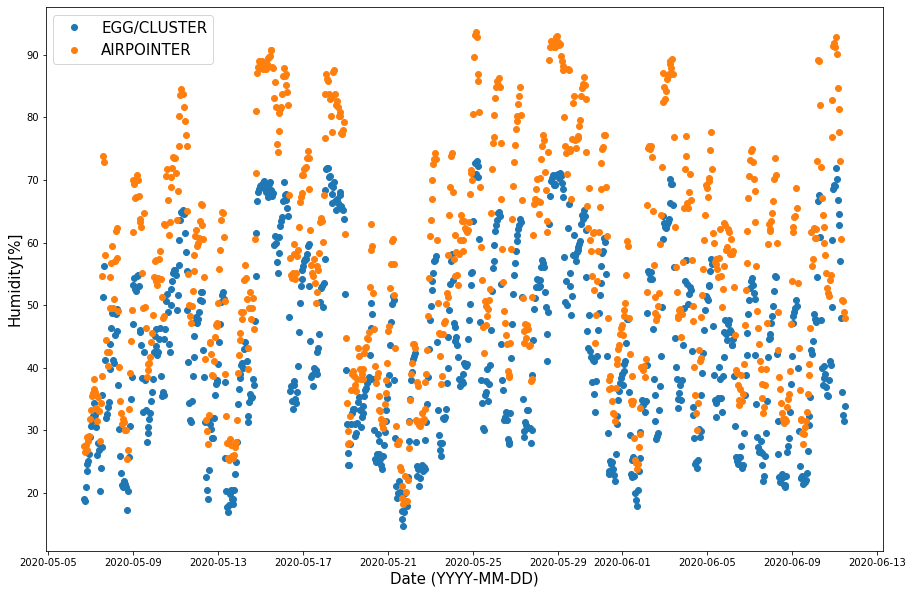

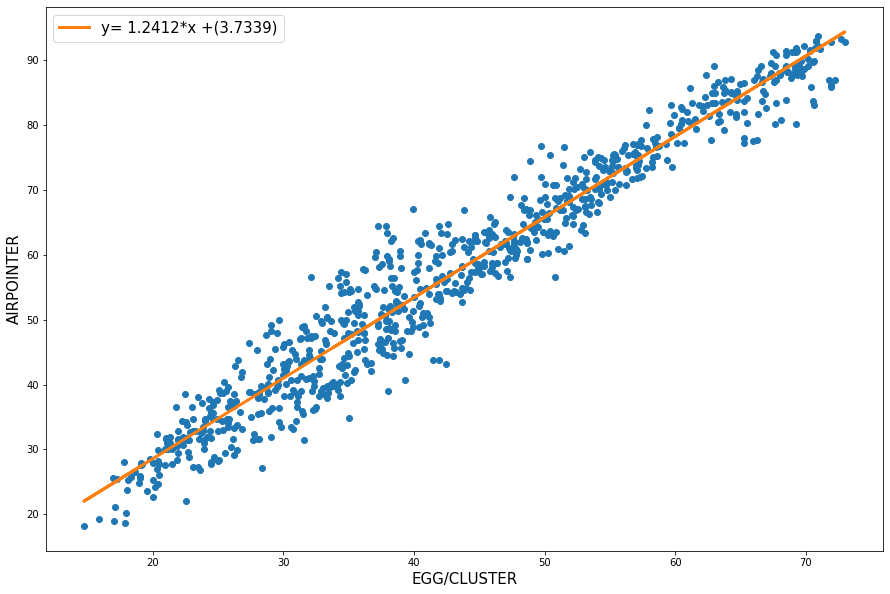

In [5]:
# ----------------------------- HUMIDITY FROM CLUSTER vs. HUMIDITY FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Humidity[percent]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['Relative_Humidity'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Humidity[%]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['Humidity[percent]'].to_numpy()
# Airpointer
yValues = dataframe['Relative_Humidity'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.64088672059907

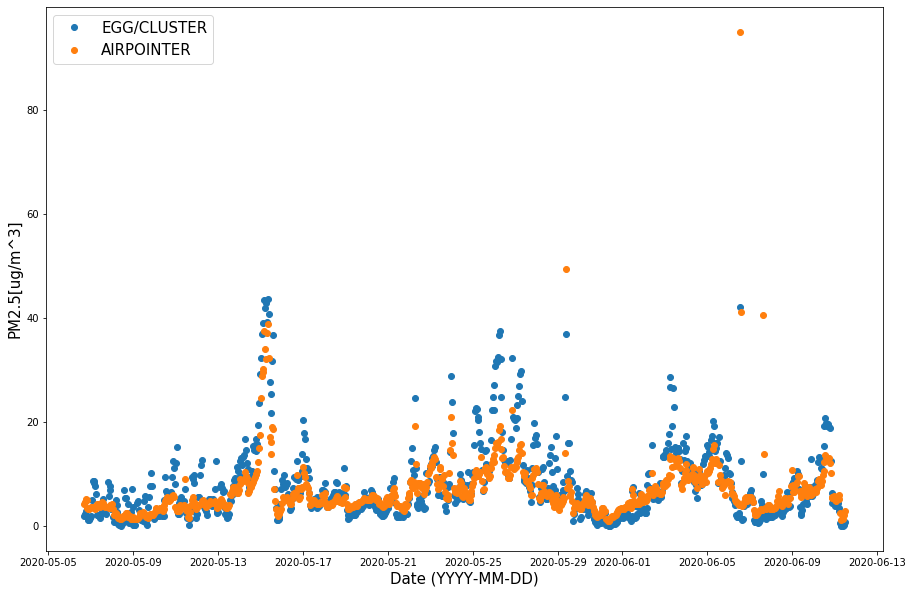

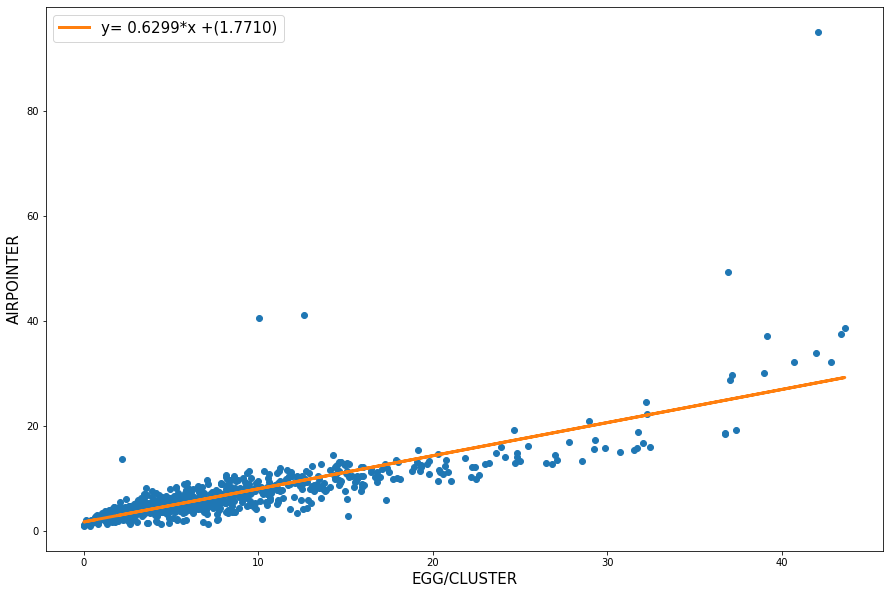

In [6]:
# ----------------------------- PM2.5 FROM CLUSTER vs. PM2.5 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['PM2.5[ug/m^3]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['PM2.5_conc'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('PM2.5[ug/m^3]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['PM2.5[ug/m^3]'].to_numpy()
# Airpointer
yValues = dataframe['PM2.5_conc'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.3972602833619515

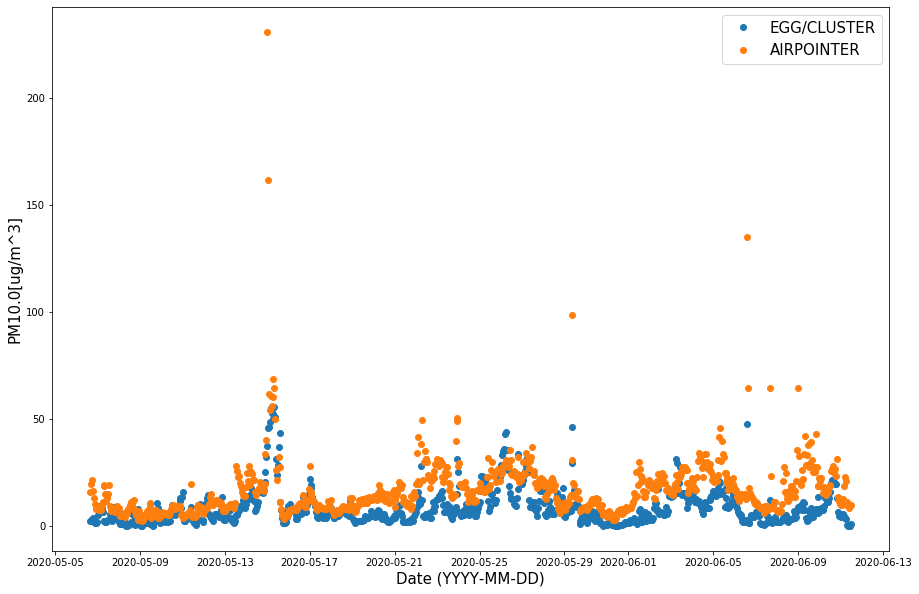

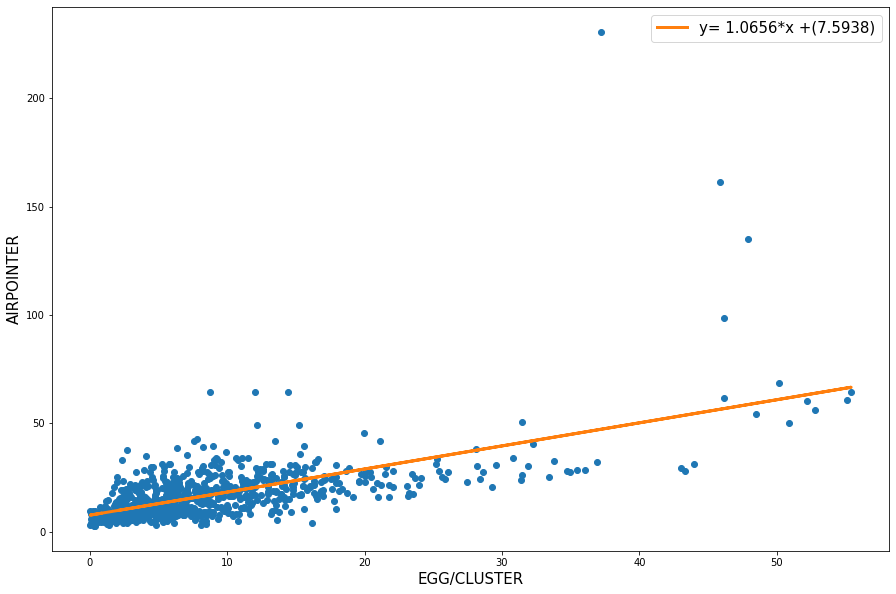

In [9]:
# ----------------------------- PM10.0 FROM CLUSTER vs. PM10.0 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['PM10.0[ug/m^3]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['PM10_conc'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('PM10.0[ug/m^3]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['PM10.0[ug/m^3]'].to_numpy()
# Airpointer
yValues = dataframe['PM10_conc'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.5081524967870208

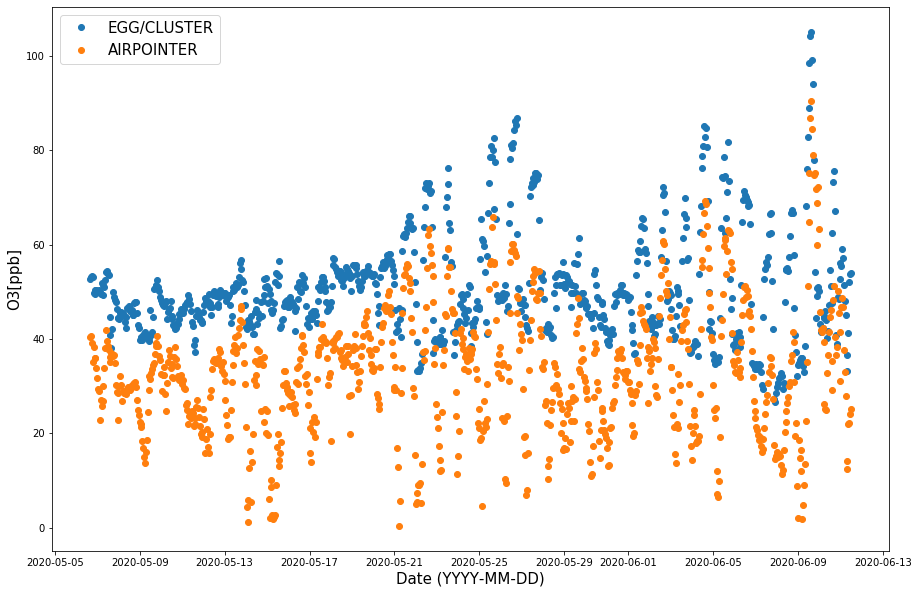

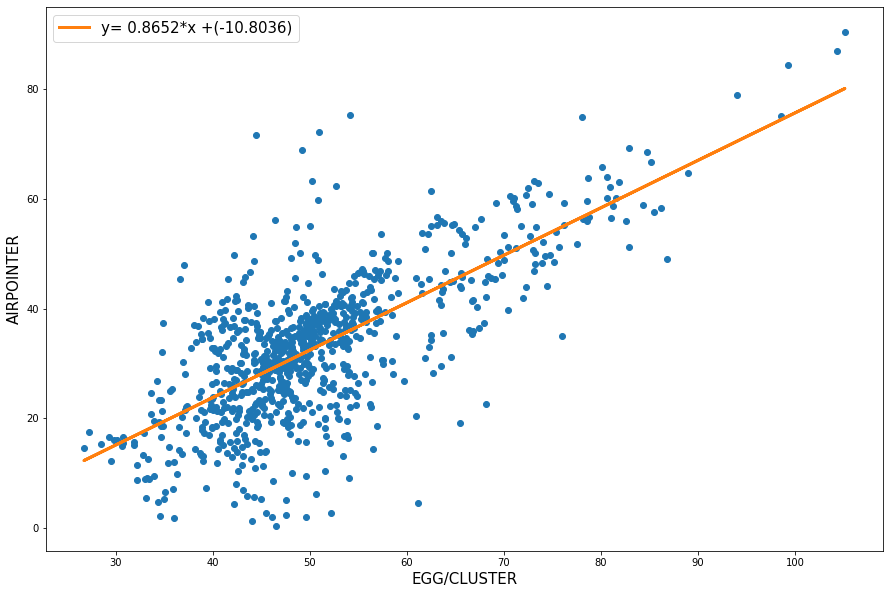

In [10]:
# ----------------------------- O3 (OZONE) FROM CLUSTER vs. O3 (OZONE) FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['O3[ppb]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['O3'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('O3[ppb]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['O3[ppb]'].to_numpy()
# Airpointer
yValues = dataframe['O3'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.4169107176335882

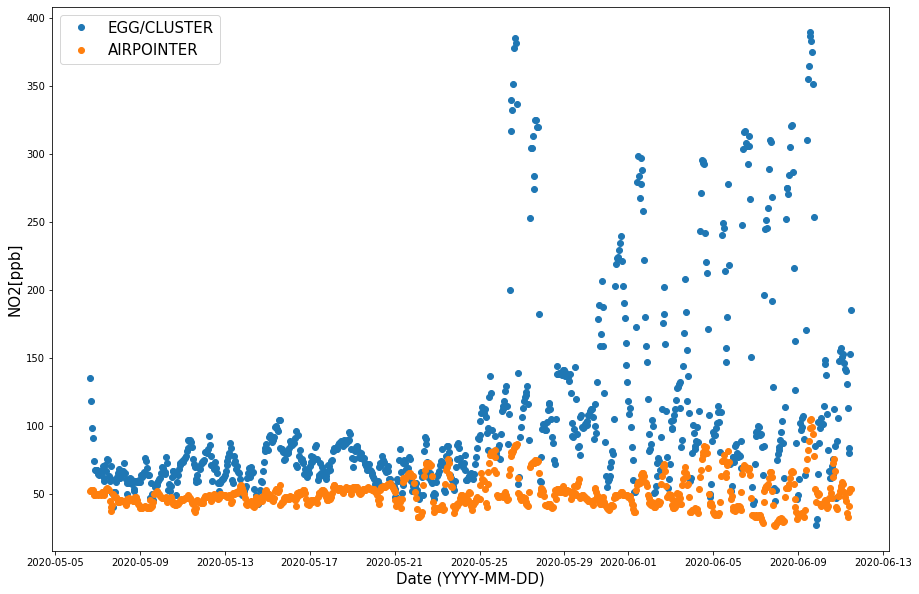

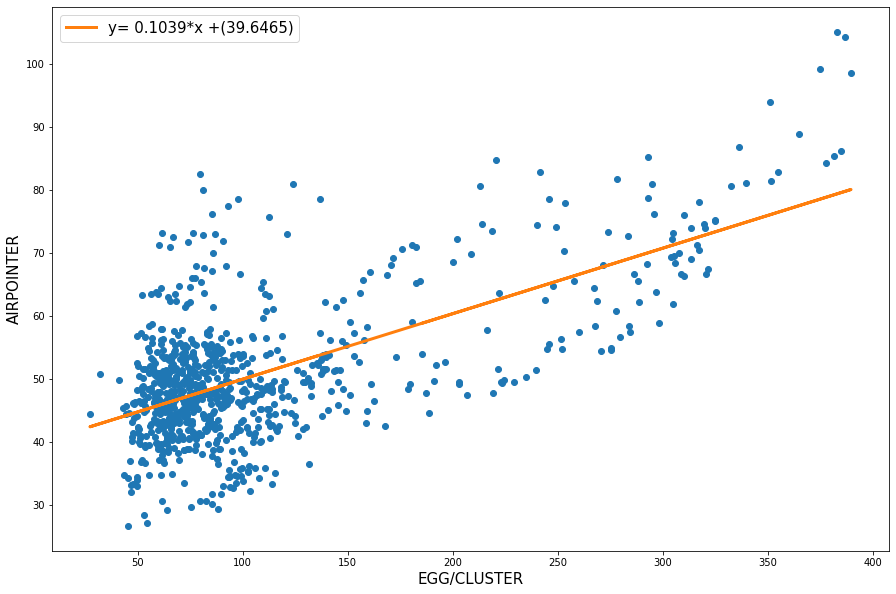

In [11]:
# ----------------------------- NO2 FROM CLUSTER vs. O3 FROM CLUSTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['O3[ppb]'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2[ppb]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['NO2[ppb]'].to_numpy()
# Airpointer
yValues = dataframe['O3[ppb]'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.027125760480230632

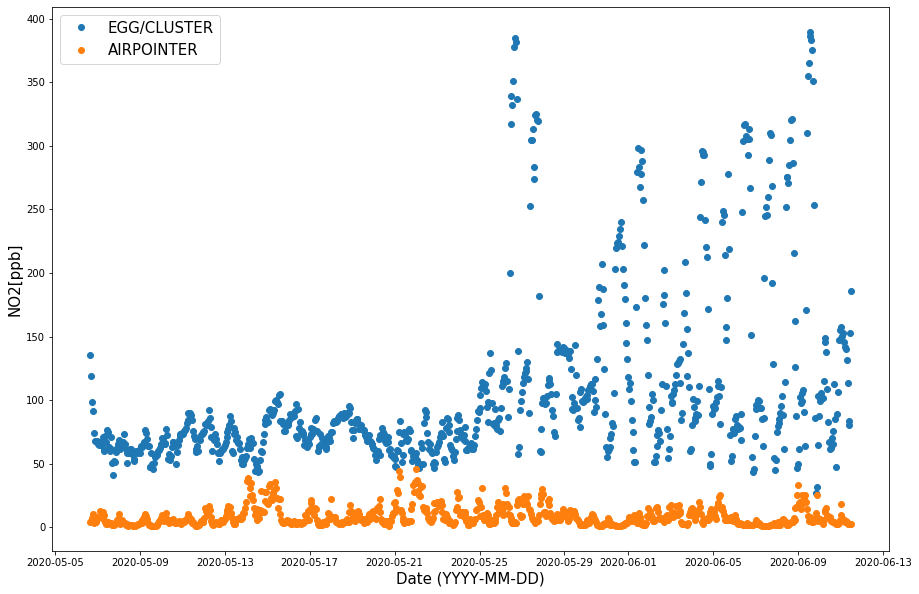

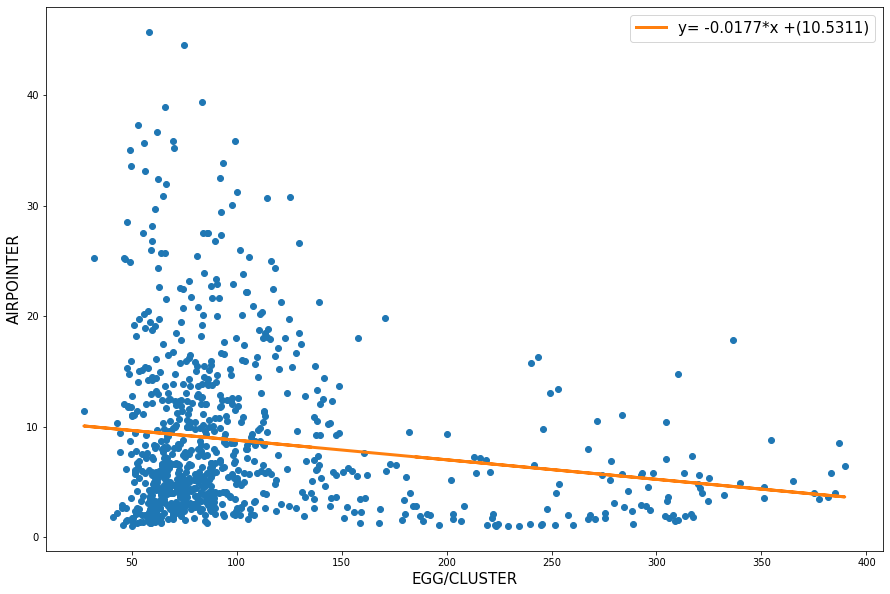

In [8]:
# ----------------------------- NO2 FROM CLUSTER vs. NO2 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['NO2'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2[ppb]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['NO2[ppb]'].to_numpy()
# Airpointer
yValues = dataframe['NO2'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))